In [16]:
import pandas as pd
df=pd.read_csv('product_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [17]:
df[df['years_as_customer']>41]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [18]:
df['week'].max()

6

## Data validation

In [19]:
df = df[df['years_as_customer'] <= 41]  # Keep only valid rows
df.shape

(14998, 8)

In [20]:
# Standardize sales_method column
df['sales_method'] = df['sales_method'].replace({
    'email': 'Email',
    'em + call': 'Email + Call'
})
df['sales_method'].nunique()

3

In [21]:
#fill the missing values in revenue column with the median revenue per unit for each sales method (we fill with the median because our data is skewed)
# Step 1: Calculate revenue per unit sold
df['revenue_per_unit'] = df['revenue'] / df['nb_sold']

# Step 2: Compute the median revenue per unit sold for each sales method
method_median_revenue = df.groupby('sales_method')['revenue_per_unit'].median()

# Step 3: Fill missing revenue values using the median revenue per unit × nb_sold
df.loc[df['revenue'].isnull(), 'revenue'] = df['nb_sold'] * df['sales_method'].map(method_median_revenue)
df['revenue'] = df['revenue'].round(2)
# Step 4: Drop the temporary column after filling missing values
df.drop(columns=['revenue_per_unit'], inplace=True)
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,99.76,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,109.74,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


## How Many Customers Were There for Each Approach?

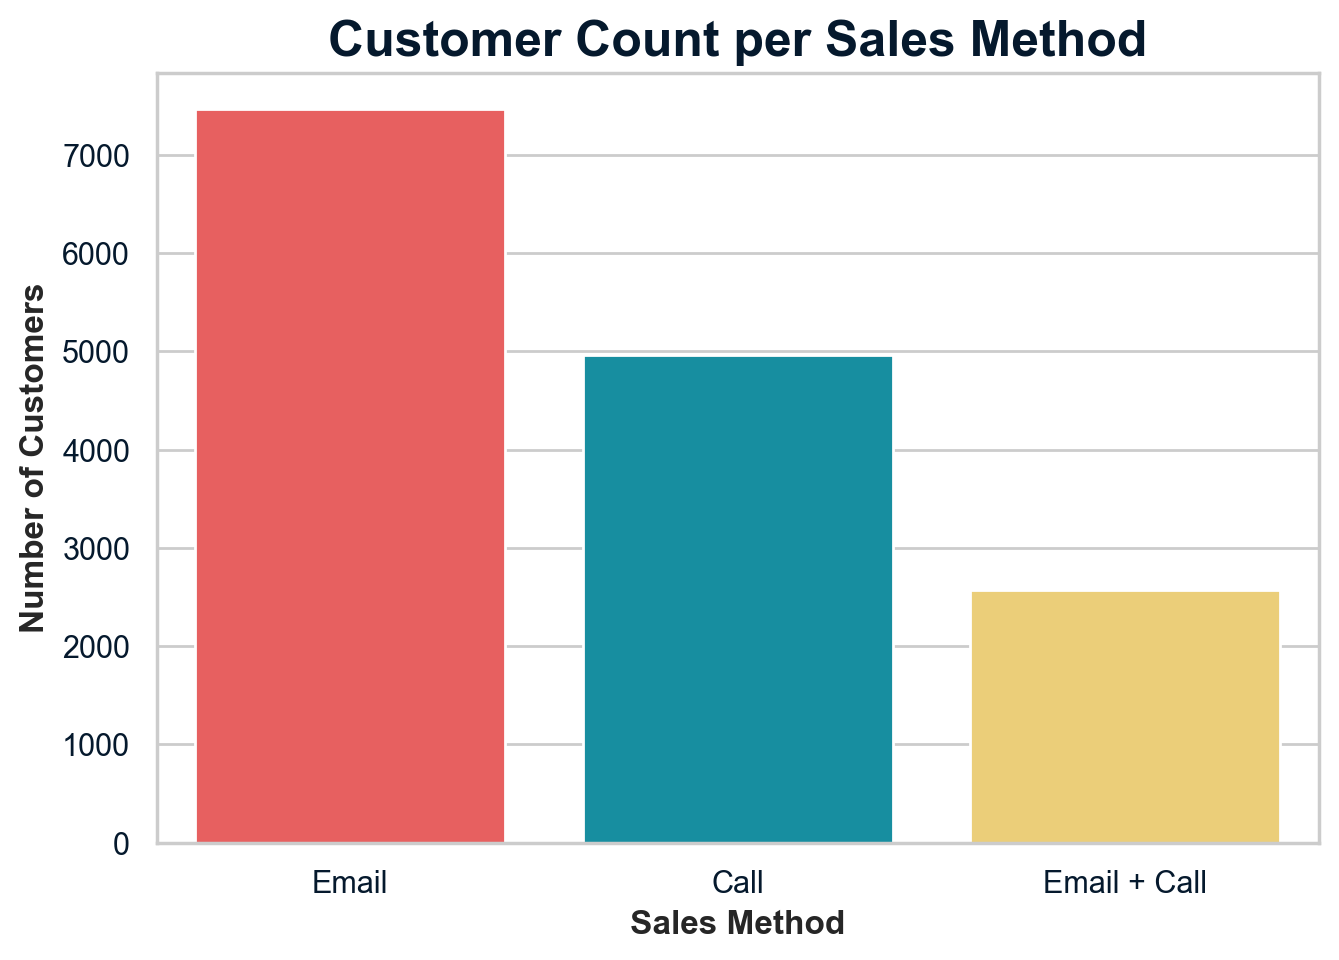

In [22]:
#single variable graph
#Bar Chart – Customer Count per Sales Method
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = {
    "Email": "#fe4a49",        
    "Call": "#009fb7",         
    "Email + Call": "#fed766"  
}
sns.set(style="whitegrid")
plt.figure(figsize=(7.5, 5))
sns.countplot(data=df, x="sales_method", palette=custom_palette, order=df["sales_method"].value_counts().index)
plt.title("Customer Count per Sales Method",fontsize=18, fontweight='bold')
plt.xlabel("Sales Method",fontweight='bold')
plt.ylabel("Number of Customers",fontweight='bold')
plt.show()


## What Does the Spread of Revenue Look Like Overall?

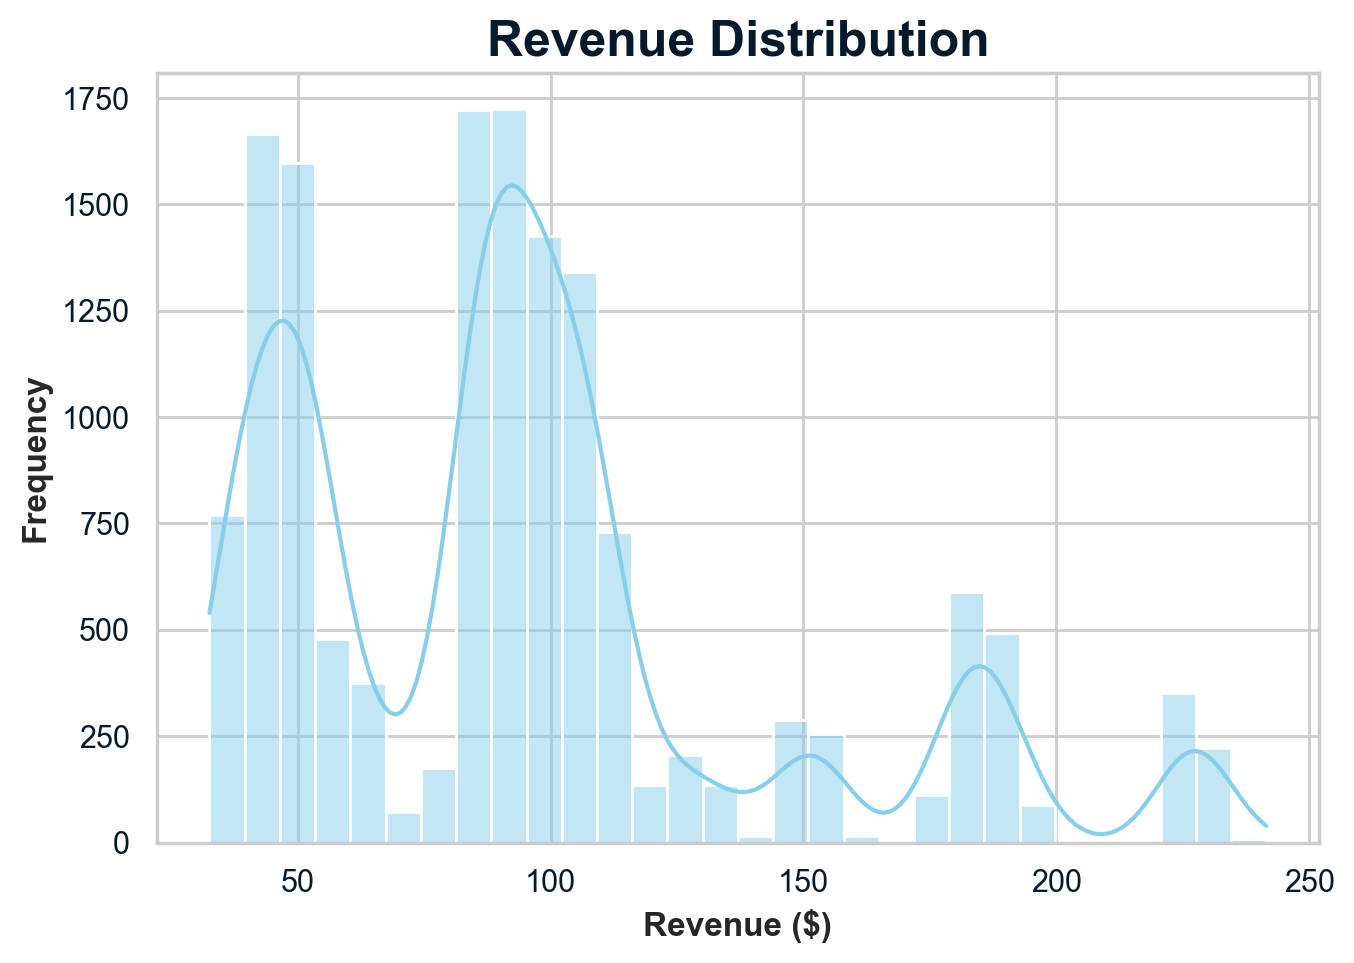

In [23]:
#single variable graph
#Histogram – Revenue Distribution
plt.figure(figsize=(7.5, 5))
sns.histplot(df["revenue"], bins=30, kde=True, color="skyblue")
plt.title("Revenue Distribution",fontsize=18, fontweight='bold')
plt.xlabel("Revenue ($)", fontweight='bold')
plt.ylabel("Frequency", fontweight='bold')
plt.show()


## What Does the Spread of Revenue Look Like for Each Method?

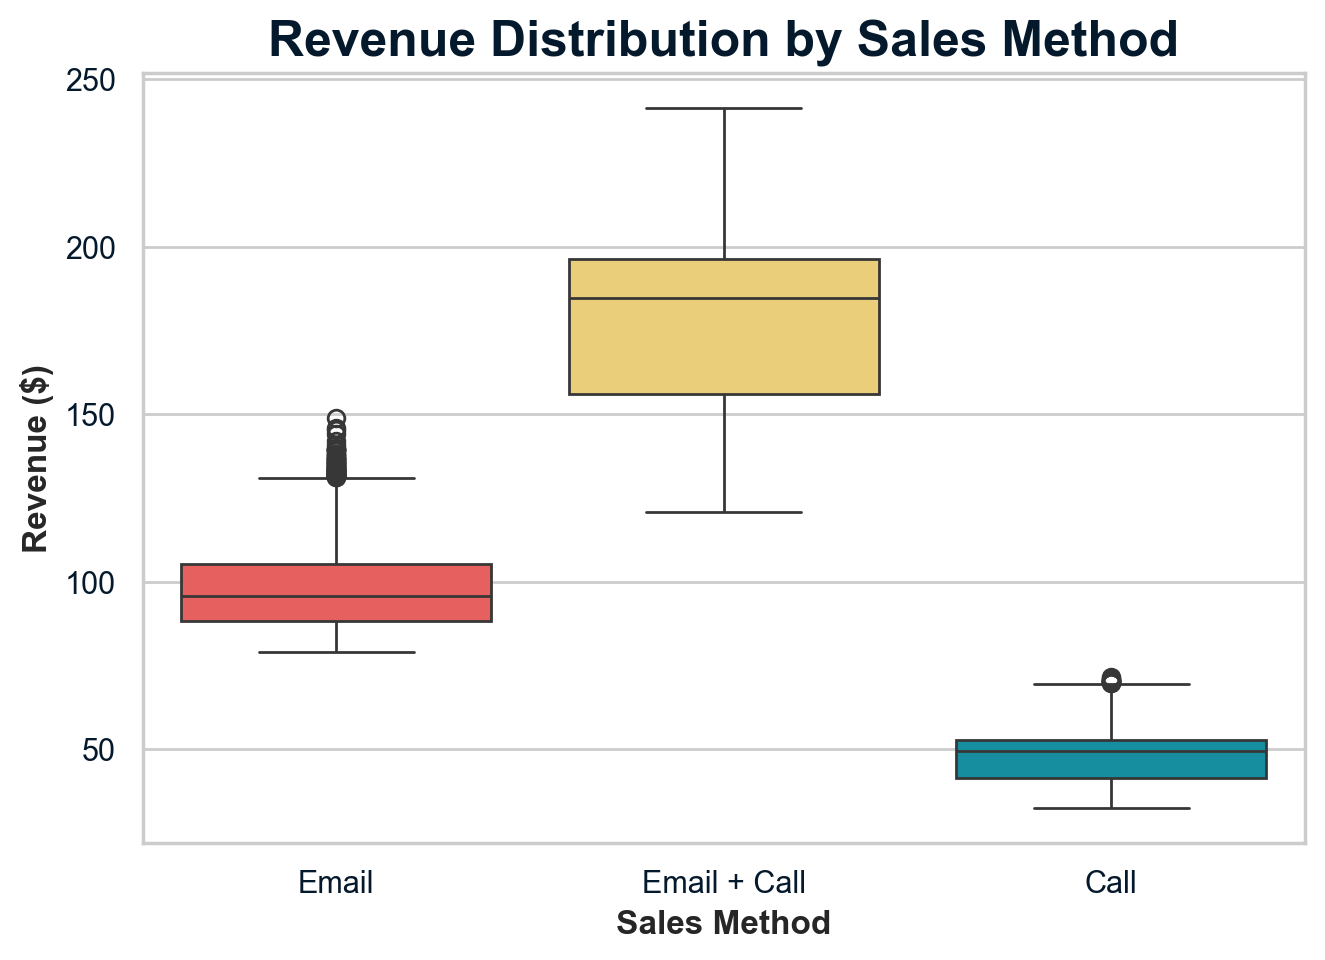

In [24]:
#Multivariable graph
#  Box Plot – Revenue by Sales Method
plt.figure(figsize=(7.5, 5))
sns.boxplot(data=df, x="sales_method", y="revenue", palette=custom_palette)
plt.title("Revenue Distribution by Sales Method",fontsize=18, fontweight='bold')
plt.xlabel("Sales Method", fontweight='bold')
plt.ylabel("Revenue ($)", fontweight='bold')
plt.show()


## Was There Any Difference in Revenue Over Time for Each Method?

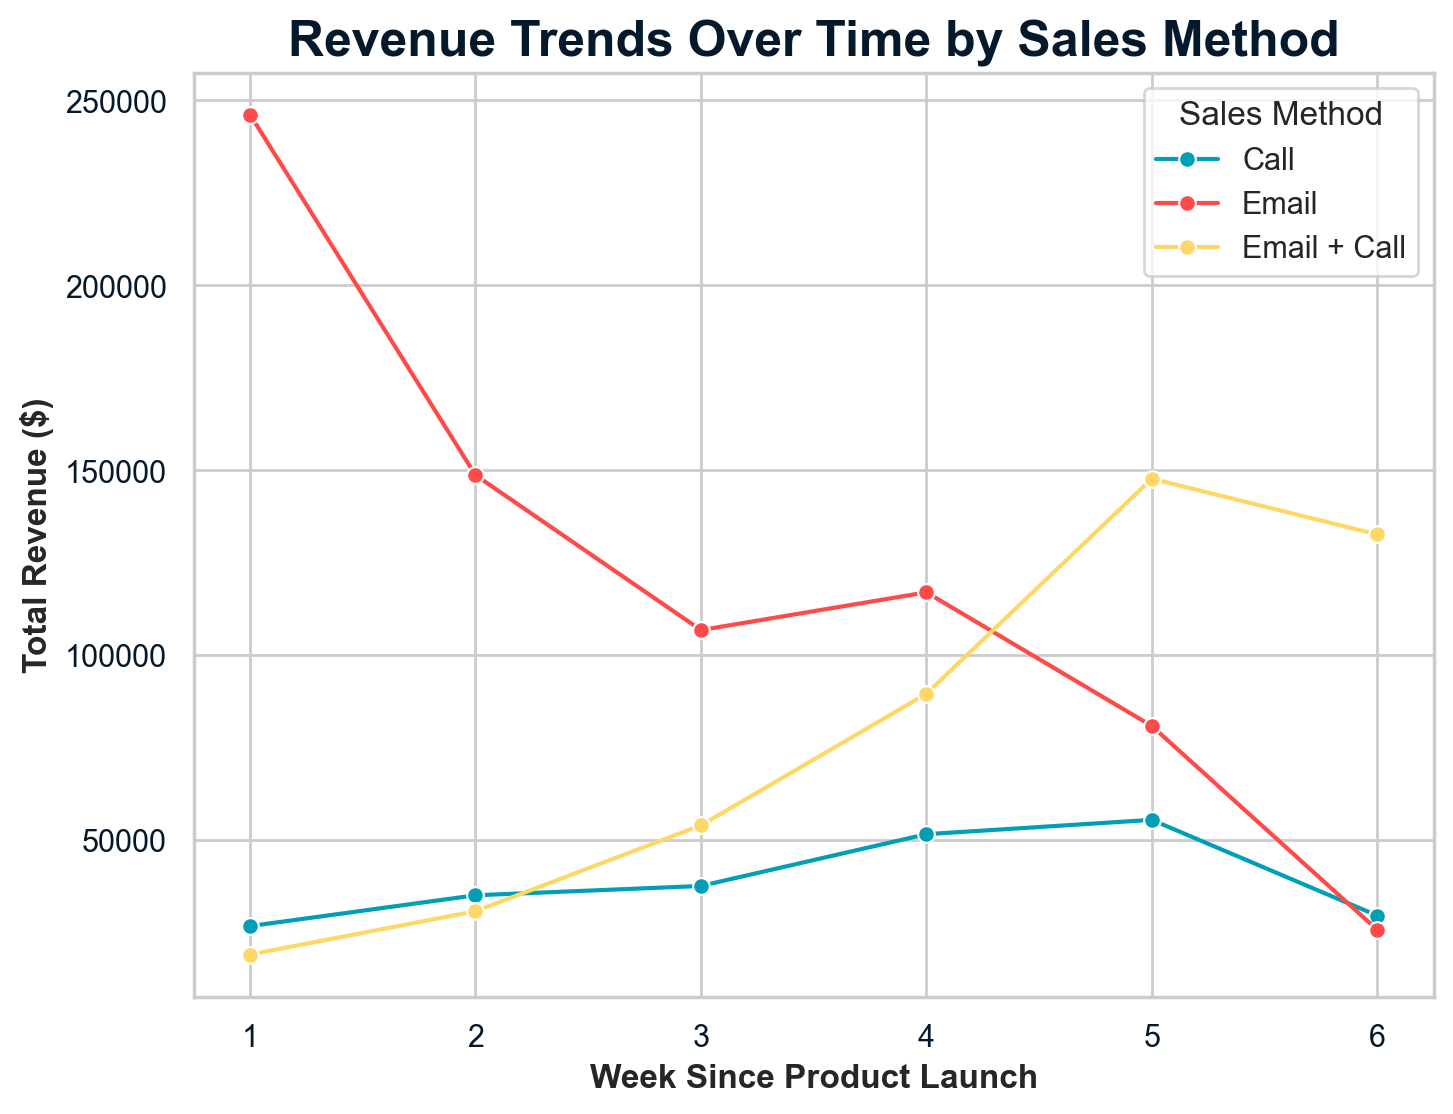

In [25]:
#Multivariable graph
#Line Chart – Revenue Over Time by Sales Method
weekly_revenue = df.groupby(["week", "sales_method"])["revenue"].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(data=weekly_revenue, x="week", y="revenue", hue="sales_method", marker="o", palette=custom_palette)
plt.title("Revenue Trends Over Time by Sales Method",fontsize=18, fontweight='bold')
plt.xlabel("Week Since Product Launch", fontweight='bold')
plt.ylabel("Total Revenue ($)", fontweight='bold')
plt.legend(title="Sales Method")
plt.show()


## Based on the Data, Which Sales Method Should We Continue to Use?

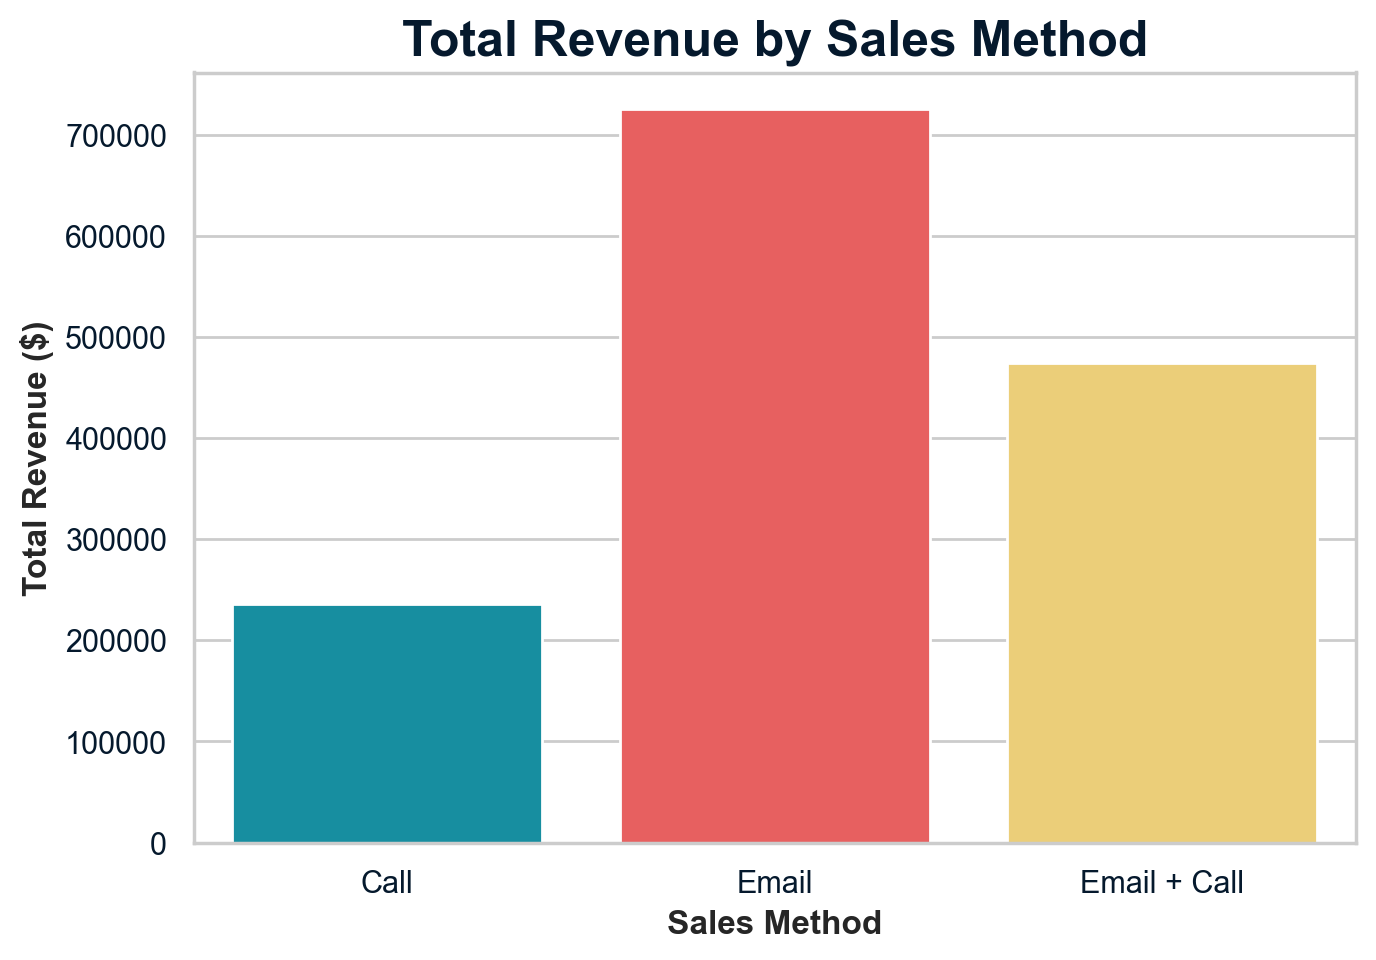

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom pastel color palette
custom_palette = {
    "Email": "#fe4a49",        
    "Call": "#009fb7",         
    "Email + Call": "#fed766"  
}

# Calculate total revenue per sales method
total_revenue_per_method = df.groupby("sales_method")["revenue"].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(7.5, 5))
sns.barplot(data=total_revenue_per_method, x="sales_method", y="revenue", palette=custom_palette)

# Add labels and title
plt.title("Total Revenue by Sales Method",fontsize=18, fontweight='bold')
plt.xlabel("Sales Method", fontweight='bold')
plt.ylabel("Total Revenue ($)", fontweight='bold')

# Show the chart
plt.show()


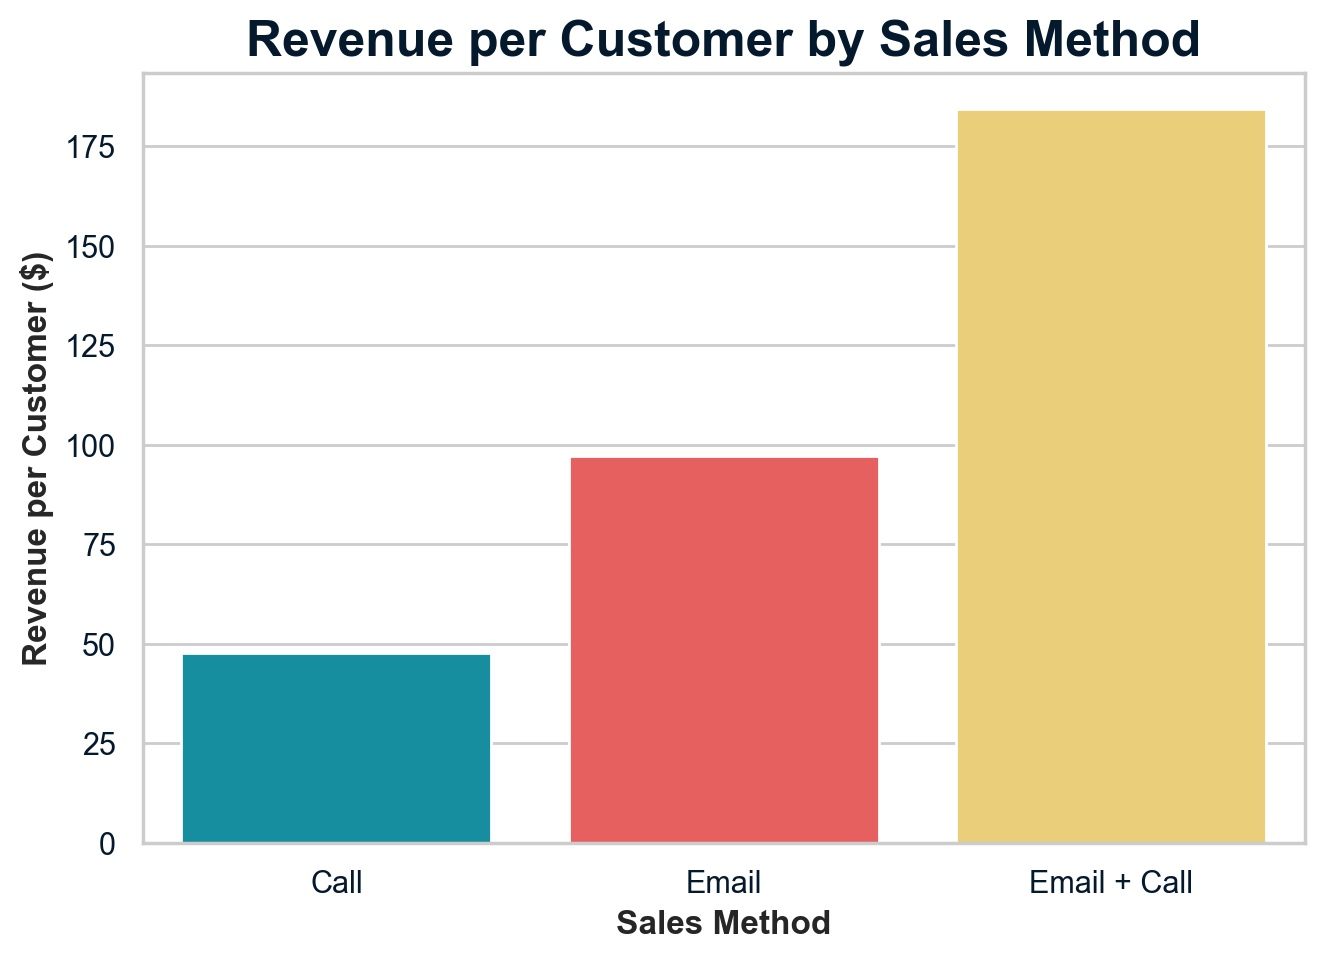

In [27]:
# Calculate revenue per unique customer for each sales method
revenue_per_customer = df.groupby("sales_method")["revenue"].sum() / df["sales_method"].value_counts()
revenue_per_customer = revenue_per_customer.reset_index()
revenue_per_customer.columns = ["sales_method", "revenue_per_customer"]

# Plot the bar chart
plt.figure(figsize=(7.5, 5))
sns.barplot(data=revenue_per_customer, x="sales_method", y="revenue_per_customer", palette=custom_palette)

# Add labels and title
plt.title("Revenue per Customer by Sales Method",fontsize=18, fontweight='bold')
plt.xlabel("Sales Method", fontweight='bold')
plt.ylabel("Revenue per Customer ($)", fontweight='bold')

# Show the chart
plt.show()
